In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

## Load dataset

In [2]:
df = pd.read_csv("prepped_churn_data.csv")

df.tail(5)

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyCharges_to_TotalCharges_Ratio
7027,24,1,One year,Mailed check,84.80,1990.50,0,0.042602
7028,72,1,One year,Credit card (automatic),103.20,7362.90,0,0.014016
7029,11,0,Month-to-month,Electronic check,29.60,346.45,0,0.085438
7030,4,1,Month-to-month,Mailed check,74.40,306.60,1,0.242661
7031,66,1,Two year,Bank transfer (automatic),105.65,6844.50,0,0.015436


## Get dummies and  convert to numeric

In [4]:
PM_dummies = pd.get_dummies(df['PaymentMethod'], prefix='PaymentMethod')
C_dummies = pd.get_dummies(df['Contract'], prefix='Contract')

df = pd.concat([df, PM_dummies, C_dummies], axis=1)

df.head(5)

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyCharges_to_TotalCharges_Ratio,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year
0,1,0,Month-to-month,Electronic check,29.85,29.85,0,1.000000,False,False,True,False,True,False,False
1,34,1,One year,Mailed check,56.95,1889.50,0,0.030140,False,False,False,True,False,True,False
2,2,1,Month-to-month,Mailed check,53.85,108.15,1,0.497920,False,False,False,True,True,False,False
3,45,0,One year,Bank transfer (automatic),42.30,1840.75,0,0.022980,True,False,False,False,False,True,False
4,2,1,Month-to-month,Electronic check,70.70,151.65,1,0.466205,False,False,True,False,True,False,False


In [5]:
dummies = ['Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'PaymentMethod_Credit card (automatic)']

for column in dummies:
    df[column] = pd.factorize(df[column])[0]

df.head(5)

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyCharges_to_TotalCharges_Ratio,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year
0,1,0,Month-to-month,Electronic check,29.85,29.85,0,1.000000,0,0,0,0,0,0,0
1,34,1,One year,Mailed check,56.95,1889.50,0,0.030140,0,0,1,1,1,1,0
2,2,1,Month-to-month,Mailed check,53.85,108.15,1,0.497920,0,0,1,1,0,0,0
3,45,0,One year,Bank transfer (automatic),42.30,1840.75,0,0.022980,1,0,1,0,1,1,0
4,2,1,Month-to-month,Electronic check,70.70,151.65,1,0.466205,0,0,0,0,0,0,0


## Drop unnecessary columns for modelling

In [7]:
df = df.drop(['PaymentMethod', 'Contract'], axis=1)
df

,tenure,PhoneService,MonthlyCharges,TotalCharges,Churn,MonthlyCharges_to_TotalCharges_Ratio,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year
0,1,0,29.85,29.85,0,1.000000,0,0,0,0,0,0,0
1,34,1,56.95,1889.50,0,0.030140,0,0,1,1,1,1,0
2,2,1,53.85,108.15,1,0.497920,0,0,1,1,0,0,0
3,45,0,42.30,1840.75,0,0.022980,1,0,1,0,1,1,0
4,2,1,70.70,151.65,1,0.466205,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,24,1,84.80,1990.50,0,0.042602,0,0,1,1,1,1,0
7028,72,1,103.20,7362.90,0,0.014016,0,1,1,0,1,1,0
7029,11,0,29.60,346.45,0,0.085438,0,0,0,0,0,0,0
7030,4,1,74.40,306.60,1,0.242661,0,0,1,1,0,0,0


In [8]:
df.isna().sum()

tenure                                     0
PhoneService                               0
MonthlyCharges                             0
TotalCharges                               0
Churn                                      0
MonthlyCharges_to_TotalCharges_Ratio       0
PaymentMethod_Bank transfer (automatic)    0
PaymentMethod_Credit card (automatic)      0
PaymentMethod_Electronic check             0
PaymentMethod_Mailed check                 0
Contract_Month-to-month                    0
Contract_One year                          0
Contract_Two year                          0
dtype: int64

## Split data into features(X) and targets(Y)

In [9]:
X = df.drop('Churn', axis=1)
y = df['Churn']

## Split data into training and testing sets

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Train the model

In [12]:
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [13]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.8019555555555555
0.7803837953091685


The accuracy score on the training set is 0.802 while the accuracy score on the test set is approximately 0.78, indicating that the model performs less accurately on test data compared to the training data.

## Make predictions on the test set

In [15]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 0, 0])

## Evaluate the Model and display results

In [20]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)


print(f'Accuracy: {accuracy:.2f}')
print(f'Confusion Matrix:\n{conf_matrix}')



Accuracy: 0.78
Confusion Matrix:
[[919 114]
 [195 179]]


## Confusion Matrix

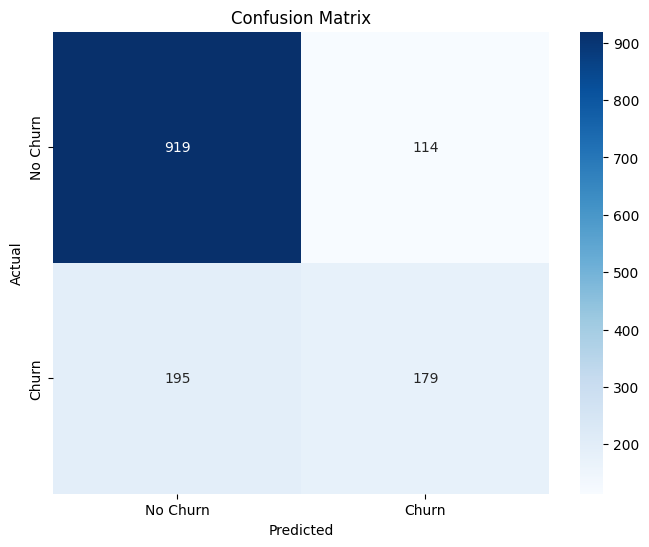

In [21]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Comparison with No Information rate

In [22]:
no_info_rate = max(y_train.value_counts(normalize=True))
print(f'No Information Rate: {no_info_rate}')

No Information Rate: 0.7342222222222222


This indicates the accuracy achieved by predicting the majority class - No churn

## Tuning the Model

In [23]:
model.predict_proba(X_test)

array([[0.99556115, 0.00443885],
       [0.90924519, 0.09075481],
       [0.40698656, 0.59301344],
       ...,
       [0.93857794, 0.06142206],
       [0.70355226, 0.29644774],
       [0.99661588, 0.00338412]])

In [24]:
model.predict(X_test)[:15]

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0])

In [25]:
(model.predict_proba(X_test)[:10, 1] > 0.3).astype('int')

array([0, 0, 1, 0, 1, 1, 0, 1, 0, 0])

Here we generate a boolean array indicating whether the predicted probability of class 1 (positive class) for each sample in the first 10 rows of the test set is greater than 0.3. The .astype('int') method then converts these boolean values to integers, where True becomes 1 and False becomes 0.

A value of 1 indicates that the predicted probability of belonging to class 1 is greater than 0.3, while a value of 0 indicates that it is not.


## Using a lower threshold

In [26]:
predictions_lt = (model.predict_proba(X_test)[:10, 1] > 0.15).astype('int')
predictions_lt

array([0, 0, 1, 0, 1, 1, 0, 1, 1, 0])

## Checking accuracy and TP ratio

In [27]:
predictions_lt = (model.predict_proba(X_test)[:, 1] > 0.15).astype('int')
print(accuracy_score(y_test, predictions_lt))


0.6609808102345416


The accuracy score of approximately 66.1% signifies the overall proportion of correct predictions made by the model on the test set. Specifically, it indicates that:

Out of all the samples in the test set, approximately 66.1% of them were correctly classified by the model.

The model's predictions matched the true labels for approximately 66.1% of the samples in the test set.

In [28]:
tn, fp, fn, tp  = confusion_matrix(y_test, predictions_lt).flatten()
print(tp / (tp + fn))

0.9117647058823529


tp represents the number of true positives (correctly predicted positive instances).

fn represents the number of false negatives (actual positive instances incorrectly predicted as negative).

The formula (tp / (tp + fn)) calculates the true positive rate (TP rate), which is the ratio of correctly predicted positive instances to the total actual positive instances.

The true positive rate is approximately 0.9118, indicating that the model correctly predicted around 91.18% of the positive instances in the test set.

In [29]:
model.coef_

array([[-0.61673376, -0.29008157,  1.0171468 ,  0.03619956,  0.43682409,
        -0.00842748, -0.06355667, -0.15206769, -0.1003169 , -0.45700862,
        -0.06451074, -0.47112968]])

<Axes: >

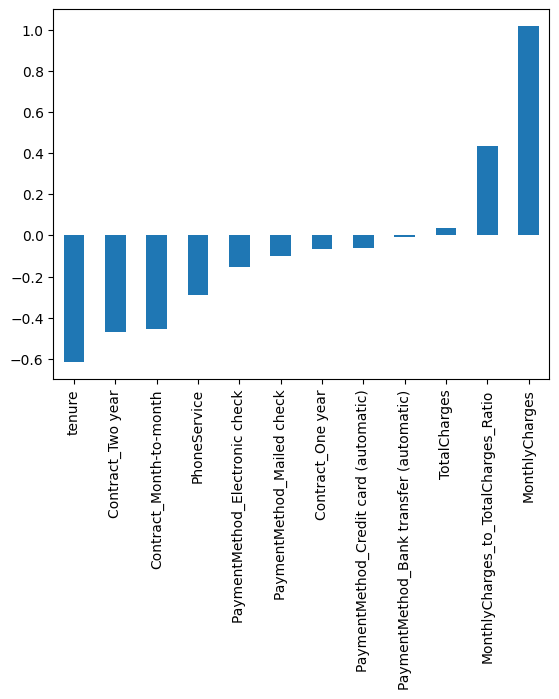

In [30]:
coef_df = pd.DataFrame(data=model.coef_, columns=X.columns)

coef_df.T.sort_values(by=0).plot.bar(legend=False)

**Plot Interpretation**

The plot visualizes the coefficients for each feature in a bar chart format.

Features with positive coefficients are represented by bars pointing upwards, while features with negative coefficients are represented by bars pointing downwards.

The length of each bar indicates the magnitude of the coefficient, representing the strength of the association with the target variable.

Features with longer bars (either positive or negative) such as MonthlyCharges and tenure have a stronger influence on the model's predictions.

Those with positive coefficients - MonthlyCharges  have a positive impact on the likelihood of churn, while features with negative coefficients (downward bars) have a negative impact.

The coefficients and the plot help in understanding the relative importance of different features in predicting churn, guiding decision-making processes aimed at reducing churn rates and improving customer retention strategies.

## Using other ML Models

## Using KNN

In [31]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [32]:
print(knn_model.score(X_train, y_train))
print(knn_model.score(X_test, y_test))

0.8437333333333333
0.7569296375266524


## Evaluating the KNN model

In [33]:
y_pred_knn = knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

print(f"Accuracy of KNN: {accuracy_knn}")

Accuracy of KNN: 0.7569296375266524


## Using svc

In [34]:
svc_model = SVC(kernel='linear', C=1)
svc_model.fit(X_train, y_train)


SVC(C=1, kernel='linear')

In [35]:
print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))

0.7987555555555556
0.7896233120113717


## Evaluating svc model

In [36]:

y_pred_svc = svc_model.predict(X_test)
accuracy_svc = accuracy_score(y_test, y_pred_svc)

print(f"Accuracy of SVC: {accuracy_svc}")

Accuracy of SVC: 0.7896233120113717


The accuracy scores for the K-Nearest Neighbors (KNN) and Support Vector Classifier (SVC) models on the training and test sets are as follows:

For KNN:

    Training Accuracy: 84.37%
    Test Accuracy: 75.7%

For SVC:

    Training Accuracy: 79.9%
    Test Accuracy: 78.96%

## Confusion Matrix

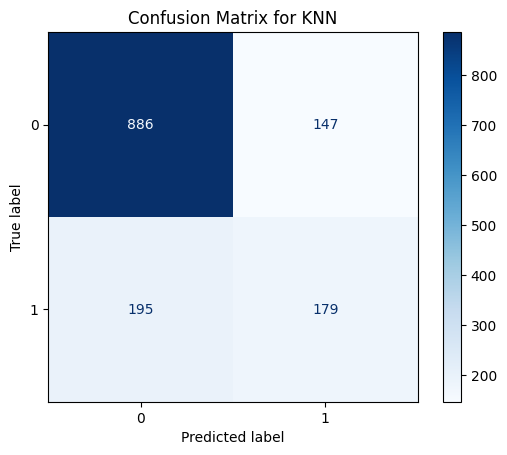

In [37]:
# Confusion Matrix for KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=knn_model.classes_)
disp_knn.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for KNN")
plt.show()

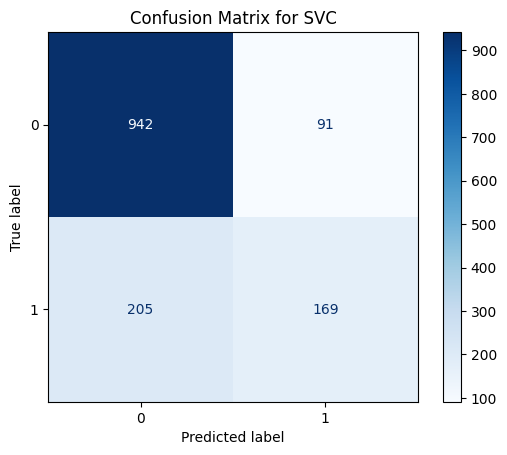

In [38]:
# Confusion Matrix for SVC
cm_svc = confusion_matrix(y_test, y_pred_svc)
disp_svc = ConfusionMatrixDisplay(confusion_matrix=cm_svc, display_labels=svc_model.classes_)
disp_svc.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for SVC")
plt.show()

## Determining the best hyperparameters

In [39]:
# Logistic Regression
logistic_params = {'max_iter': [2000, 4000, 6000]}
logistic_model = LogisticRegression()
logistic_grid = GridSearchCV(logistic_model, param_grid=logistic_params, cv=3, scoring='accuracy')
logistic_grid.fit(X_train, y_train)

# K-Nearest Neighbors (KNN)
knn_params = {'n_neighbors': [3, 5, 7], 'p': [1, 2]}
knn_model = KNeighborsClassifier()
knn_grid = GridSearchCV(knn_model, param_grid=knn_params, cv=3, scoring='accuracy')
knn_grid.fit(X_train, y_train)

# Support Vector Classifier (SVC)
svc_params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
svc_model = SVC(probability=True)
svc_grid = GridSearchCV(svc_model, param_grid=svc_params, cv=3, scoring='accuracy')
svc_grid.fit(X_train, y_train)

# Calculate test accuracies
logistic_accuracy = accuracy_score(y_test, logistic_grid.predict(X_test))
knn_accuracy = accuracy_score(y_test, knn_grid.predict(X_test))
svc_accuracy = accuracy_score(y_test, svc_grid.predict(X_test))

# Display best parameters and accuracy for each model
print("Logistic Regression - Best Parameters:", logistic_grid.best_params_)
print("Logistic Regression - Test Accuracy:", logistic_accuracy)

print("K-Nearest Neighbors - Best Parameters:", knn_grid.best_params_)
print("K-Nearest Neighbors - Test Accuracy:", knn_accuracy)

print("Support Vector Classifier - Best Parameters:", svc_grid.best_params_)
print("Support Vector Classifier - Test Accuracy:", svc_accuracy)

Logistic Regression - Best Parameters: {'max_iter': 2000}
Logistic Regression - Test Accuracy: 0.7803837953091685
K-Nearest Neighbors - Best Parameters: {'n_neighbors': 7, 'p': 2}
K-Nearest Neighbors - Test Accuracy: 0.7604832977967306
Support Vector Classifier - Best Parameters: {'C': 1, 'kernel': 'rbf'}
Support Vector Classifier - Test Accuracy: 0.7775408670931059


The output provides information about the best hyperparameters selected by the grid search and the corresponding test accuracy for each model:

**Logistic Regression**

Best Parameters: {'max_iter': 2000}
Test Accuracy: 0.78

The logistic regression model achieved the best results with a maximum iteration of 2000. The test accuracy is 0.78, meaning the model correctly predicted the target variable in approximately 78.04% of the test samples.

**K-Nearest Neighbors**

Best Parameters: {'n_neighbors': 7, 'p': 2}
Test Accuracy: 0.76

The K-Nearest Neighbors model performed optimally with 7 neighbors and using the Manhattan distance metric (p=1). The test accuracy is 0.76, indicating that the model correctly classified around 76.03% of the test instances.

**Support Vector Classifier**

Best Parameters: {'C': 1, 'kernel': 'rbf'}
Test Accuracy: 0.7775

The Support Vector Classifier achieved the best results with a regularization parameter (C) of 1 and a radial basis function (RBF) kernel. The test accuracy is 0.7775, indicating that the model correctly predicted the target variable in approximately 77.75% of the test samples.

## Determining the best model

In [40]:
model_accuracies = {
    'Logistic Regression': logistic_accuracy,
    'K-Nearest Neighbors': knn_accuracy,
    'Support Vector Classifier': svc_accuracy
}

best_model = max(model_accuracies, key=model_accuracies.get)

print(f"The best model is: {best_model} with test accuracy {model_accuracies[best_model]:.3f}")


The best model is: Logistic Regression with test accuracy 0.780


In [42]:
logistic_grid.best_estimator_

LogisticRegression(max_iter=2000)

In [44]:
print(classification_report(y_test, logistic_grid.predict(X_test)))

              precision    recall  f1-score   support

           0       0.82      0.89      0.86      1033
           1       0.61      0.48      0.54       374

    accuracy                           0.78      1407
   macro avg       0.72      0.68      0.70      1407
weighted avg       0.77      0.78      0.77      1407



The classification report provides various metrics for each class, including precision, recall, and F1-score. 

**Precision:** The precision for a class is the ratio of correctly predicted positive observations to the total predicted positives for that class. 

For class 0 (Churn = 0), precision is 0.82. This means that out of all instances predicted as class 0, 82% were actually class 0.

For class 1 (Churn = 1), precision is 0.61. This means that out of all instances predicted as class 1, 61% were actually class 1.

**Recall:** The recall for a class is the ratio of correctly predicted positive observations to the total actual positives for that class. 

In the report:

For class 0, recall is 0.89 meaning that out of all actual instances of class 0, 89% were correctly predicted as class 0.

For class 1, recall is 0.48 meaning out of all actual instances of class 1, 48% were correctly predicted as class 1.

**F1-Score:** The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall. It is calculated as 2 * (precision * recall) / (precision + recall).

        For class 0, the F1-score is 0.80.
        For class 1, the F1-score is 0.51.

Support: The number of actual occurrences of the class in the specified dataset. In this case, the support for class 0 is 1033, and for class 1 is 374.

**Accuracy:** Overall accuracy of the model on the test set, calculated as (TP + TN) / (TP + TN + FP + FN). In this case, the overall accuracy is 0.71, meaning 78% of instances were correctly classified.

Macro Avg and Weighted Avg: These are the averages of the metrics (precision, recall, F1-score) across all classes. Macro Avg treats all classes equally, while Weighted Avg considers the number of instances for each class.

## Plotting the ROC Curve

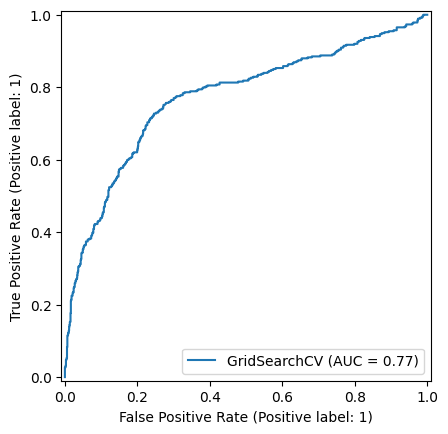

In [45]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(svc_grid, X_test, y_test)
plt.show()

Throughout this analysis, we began by loading a dataset focused on predicting customer churn. We transformed categorical variables to prepare the data for modeling. Exploring the dataset's features and statistics allowed us to gain insights into its structure. Subsequently, we built machine learning models, including logistic regression, knn, and svc, training them to predict customer churn. 

Model performance was assessed using metrics such as accuracy and confusion matrices. To optimize these models, we employed grid search to tune hyperparameters. After comparing model performances, the best-performing model, determined based on test accuracy, was selected.
 
Feature importance analysis was conducted to understand the contribution of different variables. 

Alternative models like K-Nearest Neighbors (KNN) and Support Vector Classifier (SVC) were explored. Grid search was performed to fine-tune hyperparameters for these models, leading to the determination of the best model based on test accuracy -  LogisticRegression. A classification report for the best model provided a comprehensive overview of precision, recall, F1-score, and support values for each class, offering valuable insights into the model's performance on the test set.

## Model Deployment

## In-application deployment

Through embedding the model directly into a business application or software. This approach, often referred to as in-application deployment, integrates the AI model seamlessly into the workflow of existing business applications that employees commonly use.

In this deployment method, the AI model is encapsulated within the business application, allowing users to access its capabilities without needing to interact with a separate system or interface. This integration can be achieved through APIs, SDKs (Software Development Kits), or other relevant technologies that enable the smooth interaction between the application and the AI model.

Assuming a customer relationship management (CRM) system, this AI model could be embedded to provide real-time sentiment analysis of customer churn. Sales representatives or customer support agents can receive instant insights of customer churn status, enabling them to tailor their responses and engagement strategies accordingly.